In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats


In [2]:
file = "final_merge_data.csv"
data = pd.read_csv(file)
data.head()

,Park,Year,Month,Temp,Lat,Lng,Visits
0,Acadia National Park,2009,1,21.501818,44.338556,-68.273335,9366
1,Acadia National Park,2009,2,28.770000,44.338556,-68.273335,9751
2,Acadia National Park,2009,3,32.956000,44.338556,-68.273335,19258
3,Acadia National Park,2009,4,45.278000,44.338556,-68.273335,59277
4,Acadia National Park,2009,5,54.897273,44.338556,-68.273335,129885


In [3]:
by_year_mean = data.groupby(["Year"]).mean()
by_year_mean = by_year_mean.reset_index()


by_year_sum = data.groupby(["Year"]).sum()
by_year_sum = by_year_sum.reset_index()
#by_year_sum

by_year_mean

,Year,Month,Temp,Lat,Lng,Visits
0,2009,6.5,51.435499,41.634349,-106.078574,304545.641667
1,2010,6.5,51.640536,41.634349,-106.078574,310279.191667
2,2011,6.5,50.834949,41.634349,-106.078574,303644.341667
3,2012,6.5,53.582684,41.634349,-106.078574,314456.575000
4,2013,6.5,52.014109,41.634349,-106.078574,306805.950000
5,2014,6.5,52.758805,41.634349,-106.078574,331779.508333
6,2015,6.5,53.514632,41.634349,-106.078574,365641.841667
7,2016,6.5,53.338299,41.634349,-106.078574,402431.041667
8,2017,6.5,53.148048,41.634349,-106.078574,404352.925000
9,2018,6.5,52.873963,41.634349,-106.078574,399459.558333


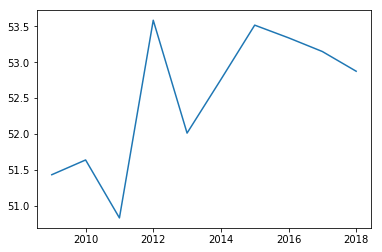

In [4]:
#plt.bar(by_year_sum["Year"], by_year_sum["Visits"])
plt.plot(by_year_mean["Year"], by_year_mean["Temp"])

plt.show()

In [5]:
rolling_temp = by_year_mean["Temp"]
rolling = rolling_temp.rolling(2).mean()

by_year_mean["Rolling_2_yr"] = rolling

by_year_mean




,Year,Month,Temp,Lat,Lng,Visits,Rolling_2_yr
0,2009,6.5,51.435499,41.634349,-106.078574,304545.641667,NaN
1,2010,6.5,51.640536,41.634349,-106.078574,310279.191667,51.538018
2,2011,6.5,50.834949,41.634349,-106.078574,303644.341667,51.237742
3,2012,6.5,53.582684,41.634349,-106.078574,314456.575000,52.208816
4,2013,6.5,52.014109,41.634349,-106.078574,306805.950000,52.798397
5,2014,6.5,52.758805,41.634349,-106.078574,331779.508333,52.386457
6,2015,6.5,53.514632,41.634349,-106.078574,365641.841667,53.136718
7,2016,6.5,53.338299,41.634349,-106.078574,402431.041667,53.426465
8,2017,6.5,53.148048,41.634349,-106.078574,404352.925000,53.243173
9,2018,6.5,52.873963,41.634349,-106.078574,399459.558333,53.011006


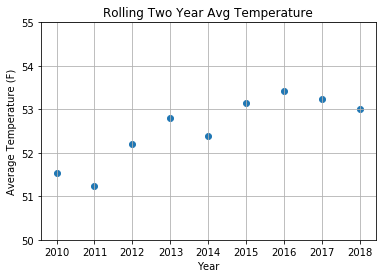

In [6]:
by_year_mean

plt.scatter(by_year_mean["Year"], by_year_mean["Rolling_2_yr"], marker="o")
plt.ylabel("Average Temperature (F)")
plt.xlabel("Year")
plt.title("Rolling Two Year Avg Temperature")
plt.ylim(50,55)
plt.grid()
plt.show()

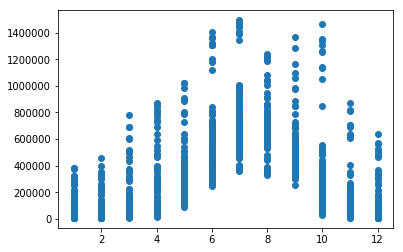

In [7]:
plt.scatter(data["Month"], data["Visits"], marker="o")
plt.show()



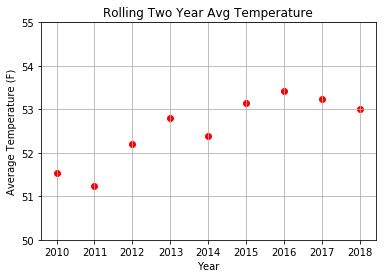

In [32]:
plt.scatter(by_year_mean["Year"], by_year_mean["Rolling_2_yr"], marker="o", c='r')
#plt.scatter(by_year_mean["Year"], by_year_mean["Visits"] / 6000, marker="o", c = 'b')
plt.ylabel("Average Temperature (F)")
plt.xlabel("Year")
plt.title("Rolling Two Year Avg Temperature")
plt.ylim(50,55)
plt.grid()

a_slope, a_int, a_r, a_p, a_std_err = stats.linregress(by_year_mean["Year"], by_year_mean["Rolling_2_yr"])
a_fit = a_slope * by_year_mean["Year"] + a_int

plt.plot(by_year_mean["Year"], a_fit, "b--", linewidth=1)

plt.show()



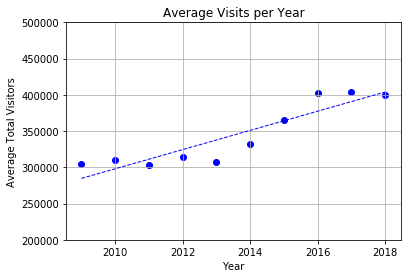

In [36]:
plt.scatter(by_year_mean["Year"], by_year_mean["Visits"], marker="o", c = 'b')
plt.ylabel("Average Total Visitors")
plt.xlabel("Year")
plt.title("Average Visits per Year")
plt.ylim(200000,500000)
plt.grid()

m_slope, m_int, m_r, m_p, m_std_err = stats.linregress(by_year_mean["Year"], by_year_mean["Visits"])
m_fit = m_slope * by_year_mean["Year"] + m_int

plt.plot(by_year_mean["Year"], m_fit, "b--", linewidth=1)

plt.show()

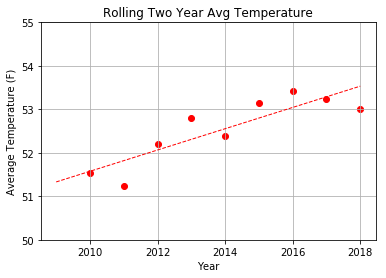

In [59]:
plt.scatter(by_year_mean["Year"], by_year_mean["Rolling_2_yr"], marker="o", c='r')
#plt.scatter(by_year_mean["Year"], by_year_mean["Visits"] / 6000, marker="o", c = 'b')
plt.ylabel("Average Temperature (F)")
plt.xlabel("Year")
plt.title("Rolling Two Year Avg Temperature")
plt.ylim(50,55)
plt.grid()

a_slope, a_int, a_r, a_p, a_std_err = stats.linregress(by_year_mean.loc[(by_year_mean["Year"] >= 2010)]["Year"],
                                                       by_year_mean.loc[(by_year_mean["Year"] >= 2010)]["Rolling_2_yr"])
a_fit = a_slope * by_year_mean["Year"] + a_int

plt.plot(by_year_mean["Year"], a_fit, "r--", linewidth=1)

plt.show()


In [53]:
#by_year_mean["Year"].tolist()

by_year_mean.loc[(by_year_mean["Year"] >= 2010)]["Year"]

1    2010
2    2011
3    2012
4    2013
5    2014
6    2015
7    2016
8    2017
9    2018
Name: Year, dtype: int64